In [1]:
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
credithistory = ctrl.Antecedent(np.arange(0,1.5,0.5), 'credithistory')
employment = ctrl.Antecedent(np.arange(0,25.5,0.5), 'employment')
incomelevel = ctrl.Antecedent(np.arange(0,3001,1), 'incomelevel')
creditstanding = ctrl.Consequent(np.arange(0,1.5,0.5), 'creditstanding')

In [3]:
credithistory.automf(names=['Bad', 'Average', 'Good'])
employment.automf(names=['Short', 'Medium', 'Long'])
incomelevel.automf(names=['Low', 'Medium', 'High'])
creditstanding.automf(names=['Low', 'Medium', 'High'])

In [4]:
creditstanding['Low'] = fuzz.trimf(creditstanding.universe, [0,0,0.5])
creditstanding['Medium'] = fuzz.trimf(creditstanding.universe, [0,0.5,1])
creditstanding['High'] = fuzz.trimf(creditstanding.universe, [0.5,1,1])

C:\Users\shiva\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


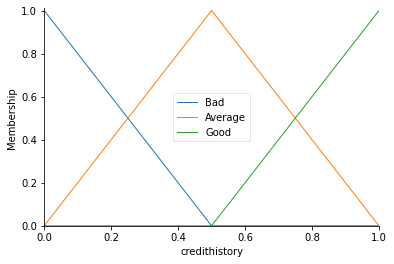

In [5]:
credithistory.view()

C:\Users\shiva\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


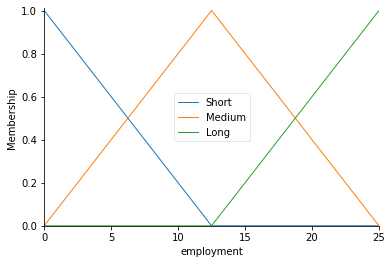

In [6]:
employment.view()

C:\Users\shiva\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


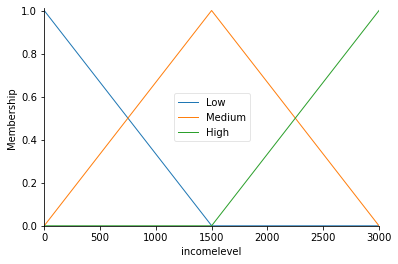

In [7]:
incomelevel.view()

C:\Users\shiva\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


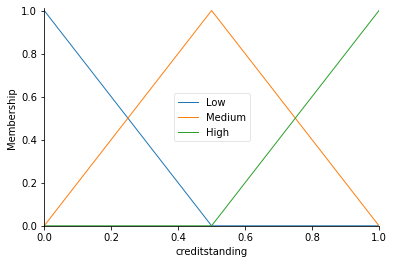

In [8]:
creditstanding.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

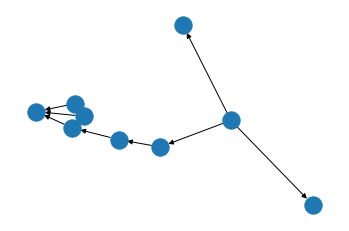

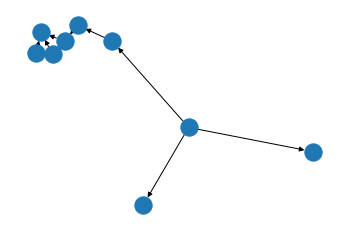

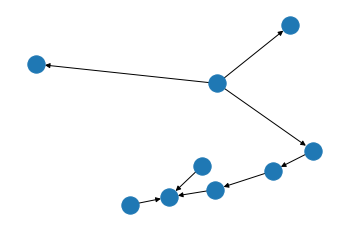

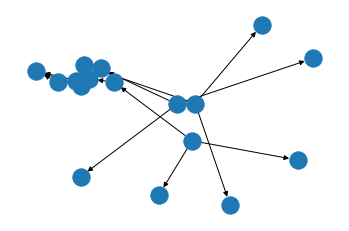

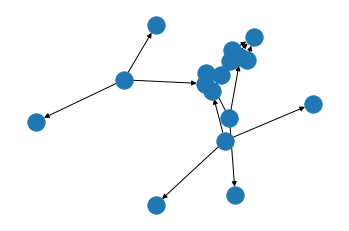

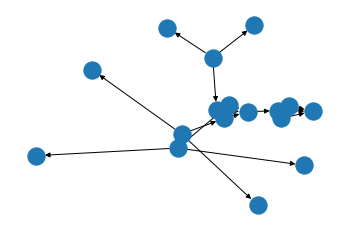

In [9]:
rule1 = ctrl.Rule(credithistory['Bad'], creditstanding['Low'])
rule1.view()
rule2 = ctrl.Rule(credithistory['Good'], creditstanding['High'])
rule2.view()
rule3 = ctrl.Rule(credithistory['Average'], creditstanding['Medium'])
rule3.view()
rule4 = ctrl.Rule(credithistory['Bad'] & employment['Short'] & incomelevel['Low'], creditstanding['Low'])
rule4.view()
rule5 = ctrl.Rule(credithistory['Good'] & employment['Long'] & incomelevel['Medium'], creditstanding['Medium'])
rule5.view()
rule6 = ctrl.Rule(credithistory['Good'] & employment['Long'] & incomelevel['High'], creditstanding['High'])
rule6.view()

In [11]:
retail_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
retail = ctrl.ControlSystemSimulation(retail_ctrl)

In [12]:
retail.input['credithistory'] = 0.6
retail.input['employment'] = 12
retail.input['incomelevel'] = 1500
retail.compute()
print(retail.output['creditstanding'])

0.5282051282051282


C:\Users\shiva\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


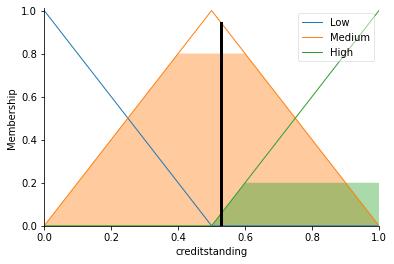

In [13]:
creditstanding.view(sim=retail)